# Pricing & Matching

Scenario: Consider the scenario in which a shop has a number of promo codes to incentivize the customers that buy an item to buy a different item. The customers can belong to different classes and the promo codes can provide different discounts.

Environment: Imagine two items (referred to as first and second items; for each item we have an infinite number of units) and four customers’ classes. The daily number of customers of each class is described by a potentially different (truncated) Gaussian probability distribution. Each class is also associated with a potentially different conversion rate returning the probability that the user will buy the first item at a given price.

Once a buyer has bought the item, she/he can decide to buy the second item that can be or not promoted. There are four different promos P0, P1, P2, P3, each corresponding to a different level of discount. P0 corresponds to no discount. Given the total number of customers, the business unit of the shop decides the number of promos as a fraction of the total number of the daily customers and is fixed (use two different settings in your experiments that you are free to choose). Each customers’ class is also associated with a potentially different conversion rate returning the probability that the user will buy the second item at a given price after she/he has bought the first. The promos will affect the conversion rate as they actually reduce the price. 

Every price available is associated with a margin obtained by the sale that is known beforehand. This holds both for the first and the second item. 

The conversion rates will change during time according to some phases due to, e.g., seasonality.

## Step 1

Provide a mathematical formulation of the problem in the case in which the daily optimization is performed using the average number of customers per class. Provide an algorithm to find the optimal solution in the offline case in which all the parameters are known. Then, during the day when customers arrive, the shop uses a randomized approach to assure that a fraction of the customers of a given class gets a specified promo according to the optimal solution. For instance, at the optimal solution, a specific fraction of the customers of the first class gets P0, another fraction P1, and so on. These fractions will be used as probabilities during the day.


### Solution Step 1

**Assumption:** 

This is the mathematical formulation for the pure pricing problem of maximization of the total reward. We consider the production costs of both the item equals to zero.

**Variables definition:**

$i$ = user category <br>
$j$ = promotional discount: P0 = 0%, P1 = 10 %, P2 = 20%, P3 = 30%<br>
$p1$ = full price of the first item (Racing skis)  <br>
$p2$ = full price of the second item (Racing ski helmet) <br>
$c1$ = production cost of racing skis = 0<br>
$c2$ = production cost of racing ski helmet = 0<br>
$q1_i(p1)$ = conversion rate for user category i, for racing skis sold at the price p1<br>
$q2_i(p2)$ = conversion rate for user category i, for racing ski helmet sold at the price p2<br>
$s_{ji}(p2)$ = discounted price of racing ski helmet, for user category i, according to promo discount j<br>
$d_{ij}$ = amount of promo j distributed to user category i<br>
$dmax$ = maximum number of promos to be to distributed (#P1+#P2+#P3)<br>
$avgCustomer_i$ = average number of customers for category i<br>

**Formulation of elaborated variables:**

$p1 * q1_i(p1) * avgCustomer_i$ = revenue for the sale of Racing skis at price p1 to user category i <br> 
$s_{ji}(p2) * q2_i(s_ji(p2)) * d_{ij} * avgCustomer_i$ = revenue for the sale of Racing ski helmet at the discounted price p2, according to the promo-category assignement (note that the dependence of the second item with the first is not taken into
account in this formula)<br> 
($p1 * q1_i(p1) - c1 * q1_i(p1)) * avgCustomer_i$ = revenue for the sale of Racing skis taking into account the production cost c1<br> 
($q2_i(p2)$*($s_{ji}(p2) * q2_i(s_{ji}(p2)) * d_{ij} - q2_i(s_{ji}(p2))) * c2) * avgCustomer_i$ = revenue for the sale of Racing ski helmet taking into account the production
cost c2<br> 

**Objective function:**

$\textrm {max} ( \sum \limits _{i = 0, j = 0} ^{i = 4, j = 4}[(p1*q1_i(p1) - c1*q1_i(p1) + $q2_i(p2)$*(s_{ji}(p2)*q2_i(s_{ji}(p2))*d_{ij} -  q2_i(s_{ji}(p2))*c2))*avgCustomer_i])$


**Constraints:**

$ \forall j>0 : [\sum \limits _{i = 0} ^{i = 4} d_{ij}] = dmax $

We have fixed the full prices of the two items: $p1$, $p2$. We retrieve the discounted prices of $p2$, applying the promos $j$.<br>
We know: the average number of customers per class i $avgCustomer_i$, the conversion rate for both products ($q1_i(p1)$, $q2_i(p2)$) and the maximum number of promos to distribute ($dmax$).
As assumption the production costs of the two items is zero (c1 = 0, c2 = 0).
It is possible to retrieve the total revenue for Racing skis as the product between the
full price of the first item, the conversion rate for the considered user category and
the average number of customers for that category:
$(p1 * q1_i(p1) * avgCustomer_i)$. For the second item the calculation of the reward is the same except for the fact
that the product is buyed only if also the first one is purchased (so we multiply also the conversion rate of the first item) and the considered price have to be discounted according to the assigned promotion.

The solution of our optimization problem consists in the distribution of the fraction of promo codes among the user categories.

**PROMO ASSIGNMENT ASSUMPTION AND IMPLEMENTATION**

We have to find the optimal solution in an offline manner (solve the maximization problem when all the parameters are known), considering the constraint that the shop uses a randomized approach to assure that a fraction of a given customer category
gets a specified promotion, according to the optimal solution.
We have used an iterative approach to reach the optimal solution: we build a customer category-promotion (matching) matrix, which contains the mean expected rewards for every matching, calculated as the product between the conversion rate
of the Racing ski helmet and its discounted price. The goal is to obtain, for each customer-promo matching, the fraction of customers that will receive this discount, in order to maximize the total reward.
We select the best reward for every class, for four times, retrieving, at each iteration, the four best combination of category-promotion and assigning an infinite weight to the obtained sub-optimal matching.
Every matching is represented by a reward configuration that maximize the total reward, every iteration is weighted and represent a different goodnesses of the solution (the first is the best, the last is the worst).
Through the sub-optimal matchings, we have retrieved the fractions of different promos to assign to every customer categories, based on the proportional weight of the previous sub-optimal matching. Then the retrieved proportions, are normalized category per category.


For completeness, we have implemented a script that solve this optimization problem. It is possible to see the solution composed by the promo distribution and the results in terms of reward. 



Optimal solution: probability distribution of promos per class (rows: class, col: promos) 
[[0.06 0.27 0.52 0.15]
 [0.12 0.54 0.07 0.26]
 [0.52 0.13 0.28 0.07]
 [0.17 0.04 0.1  0.69]]





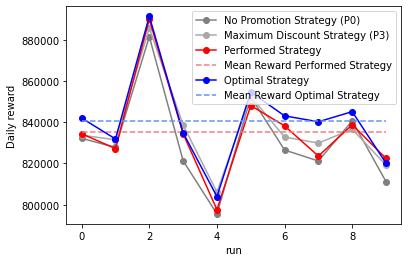

In [1]:
import numpy as np
from scipy.optimize import linear_sum_assignment # library that implement this algorithm
import matplotlib.pyplot as plt
from Context import *

def optimalSolutionsIterations(matching_matrix, verbose = False):
    iteration_matrix = []
    for i in range(4):
        row_ind,col_ind = linear_sum_assignment(matching_matrix,maximize=True) # optimization 
        temp = np.zeros((4,4))
        for ind in range(0,len(row_ind)):
            temp[row_ind[ind],col_ind[ind]] =  matching_matrix[row_ind[ind],col_ind[ind]]
            matching_matrix[row_ind[ind],col_ind[ind]] = np.iinfo(np.int64).min # - infinity
        
        iteration_matrix.append(temp)
    return iteration_matrix


def promoDistribution(iteration_matrix, class_final_distribution, verbose = False):
    """
        w è il peso di ogni iterazione e viene dimezzato ogni volta. 
        le distribuzioni vengono assegnate in base alla (sub)otimal solution che stiamo considerando, in base ai reward che quella configuraizone produce 
    """
    w = 1
    for i in range(4):
        iter_sum = np.sum(iteration_matrix[i])
        coordinates = np.nonzero(iteration_matrix[i])
        for idx in range(len(coordinates[0])):
            class_final_distribution[coordinates[0][idx], coordinates[1][idx]] = (100 * iteration_matrix[i][coordinates[0][idx], coordinates[1][idx]] / iter_sum ) * w
        w = w/2


    return class_final_distribution

def computeClassPromoDistribution(iteration_matrix,class_final_distribution,verbose=False):
    
    """
        calcolo la distribuzione tenendo conto dell'intera matrice, cioè anche della colonna P0 
    """
    promoDistribution(iteration_matrix, class_final_distribution,verbose)   # compute the distribution for promos P0, P1, P2, P3

    # normalize the distributions row by row
    for i in range(0,4):
        sum_per_class=(np.sum(class_final_distribution[i]))
        for j in range(0,4):
            class_final_distribution[i,j] = (class_final_distribution[i,j]*100/sum_per_class)/100  # do not cast to integer!
    return class_final_distribution

#
# Experiment 1 
#

item1_price_full = 2350.0
item2_price_full = 630.0 
class_final_distribution = np.zeros((4,4))  # this 4x4 matrix contains the probablilty that to a user, belonging to a category (row) is given a certaind discount (columns)

# context generation 
ctx = Context()
customer_daily = ctx.customers_daily_instance() # return a vector corresponding to numbers of customers per class 
total_clients = np.sum(customer_daily)
no_promo = int(total_clients * ctx.amount_of_no_promos) # percentage no-promo over the daily total number of customers  
total_promo = total_clients - no_promo


# Calculate of the customers that buy the first item
# Use the conversion rate of the first item (at the defined price), as fractions of buyers
first_item_acquirents = np.zeros((4))

for i in range (0,4):
    first_item_acquirents[i]=int(customer_daily[i] * ctx.conversion_rate_first_element(item1_price_full, i))

# knowing the numbers of customers that bought the first item, we aims to maximize the profit making them buy the second item
# Considering as known the conversion rate of each class, in order to maximize the profit we can determine which discout apply to a class 
# Solved as Matching Problem: match every user category to all the four possible discounts (P0, P1, P2, P3) with the pobability to apply it in order to maximize the profit

# discounted price for the second items
discounted_price = [item2_price_full,
    item2_price_full*(1-ctx.discount_promos[1]),
    item2_price_full*(1-ctx.discount_promos[2]),
    item2_price_full*(1-ctx.discount_promos[3])]

# Matching matrix: rows[0..3] are the user categories; columns[0..3] are the discouts; celles are the weights calculated as (conversion_rate * discounted_price * tot_clients) of that class
matching_matrix = np.zeros((4,4))
for i in range (0,4): #classes
    for j in range (0,4): #promos
        matching_matrix[i,j] = int(discounted_price[j]*(ctx.conversion_rate_second_element(discounted_price[j],i))*first_item_acquirents[i])


# the matching is performed iterating over the matching_matrix four times. Every iteration determine the optimal solution of the matching problem, which allow to maximize the profit
# the iteration_matrix save collect all these oprimal solutions
iteration_matrix = optimalSolutionsIterations(matching_matrix=matching_matrix.copy(),verbose=True)

# compiling the class final distribution matrix 
class_final_distribution = computeClassPromoDistribution(iteration_matrix,class_final_distribution,True)


print(f"\n\nOptimal solution: probability distribution of promos per class (rows: class, col: promos) \n{class_final_distribution.round(2)}\n\n\n")

#
# testing our solution
#

n_experiments = 10

optimal_solution_matrix = np.zeros((4,4))
row_ind, col_ind = (linear_sum_assignment(matching_matrix,maximize=True))
for r,c in zip(row_ind,col_ind):
    optimal_solution_matrix[r,c] = 1

daily_reward_no_promotion_srategy = [] # rewards collected by experiment always appling P0 (no discount) 
daily_reward_max_discount_srategy = [] # rewards collected by experiment always appling P3 (max discount)
daily_reward_promotion_srategy = []    # rewards collected by experiment randomly extracting a promotion, according to our strategy
daily_optimal_solution = []            # rewards collected by experiment always appling the best strategy 

left_promo = total_promo

for t in range(n_experiments):
    daily_reward = [0,0,0,0]
    left_promo = total_promo
    for category in range(len(customer_daily)):
        for customer in range(customer_daily[category]): # for each category emulate the user that purchase the good
            # buy first item 
            customer_probability = ctx.conversion_rate_first_element(item1_price_full,category)
            reward_item1 = ctx.purchase(customer_probability) * item1_price_full
            reward_item2 = 0.0 
            if(reward_item1 > 0): # propose second item
                ########################
                # NO PROMOTION STRATEGY
                ########################
                customer_probability = ctx.conversion_rate_second_element(item2_price_full,category)
                reward_item2 = ctx.purchase(customer_probability) * item2_price_full
                daily_reward[0] += reward_item1 + reward_item2

                ########################
                # BEST PROMOTION STRATEGY
                ########################
                reward_item2 = 0.0
                d_price = np.min(discounted_price)
                customer_probability = ctx.conversion_rate_second_element(d_price,category)
                reward_item2 = ctx.purchase(customer_probability) * d_price
                daily_reward[1] += reward_item1 + reward_item2


                ########################
                # PROMOTION STRATEGY
                ########################
                reward_item2 = 0.0 
                idx_discount = np.random.choice([0,1,2,3], p=class_final_distribution[category])
                # give promo 
                if left_promo == 0:
                    idx_discount = 0
                elif idx_discount != 0:
                    left_promo = left_promo-1
                d_price = discounted_price[idx_discount]
                customer_probability = ctx.conversion_rate_second_element(d_price,category)
                reward_item2 = ctx.purchase(customer_probability) * d_price
                daily_reward[2] += reward_item1 + reward_item2

                ########################
                # OPTIMAL SOLUTION
                ########################
                reward_item2 = 0.0
                idx_discount = np.random.choice([0,1,2,3], p=optimal_solution_matrix[category])
                d_price = discounted_price[idx_discount]
                customer_probability = ctx.conversion_rate_second_element(d_price,category)
                reward_item2 = ctx.purchase(customer_probability) * d_price
                daily_reward[3] += reward_item1 + reward_item2          
            
    daily_reward_no_promotion_srategy.append(daily_reward[0])
    daily_reward_max_discount_srategy.append(daily_reward[1])
    daily_reward_promotion_srategy.append(daily_reward[2])
    daily_optimal_solution.append(daily_reward[3])

plt.figure(0)
plt.xlabel("run")
plt.ylabel("Daily reward")
plt.plot(daily_reward_no_promotion_srategy,'-o', color='grey', label = 'No Promotion Strategy (P0)')
plt.plot(daily_reward_max_discount_srategy,'-o', color='darkgrey', label = 'Maximum Discount Strategy (P3)')
plt.plot(daily_reward_promotion_srategy,'-o', color='red', label = 'Performed Strategy')
plt.plot(n_experiments * [np.mean(daily_reward_promotion_srategy,axis=0)],'--', color='lightcoral', label = 'Mean Reward Performed Strategy')
plt.plot(daily_optimal_solution,'-o', color='blue', label = 'Optimal Strategy')
plt.plot(n_experiments * [np.mean(daily_optimal_solution,axis=0)],'--', color='cornflowerblue', label = 'Mean Reward Optimal Strategy' )

plt.legend()
plt.show()


## Step2

Consider the online learning version of the above optimization problem, identify the random variables, and choose a model for them when each round corresponds to a single day. Consider a time horizon of one year.

### Step 2 solution
**Random variables:**

* Daily customers: gaussian

  Normalized gaussian parameters per class (normalizing factor:1000), average and variance:

       1) 0.15 0.03

       2) 0.20 0.03

       3) 0.40 0.05

       4) 0.25 0.04

 

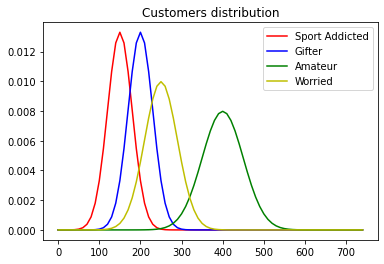

In [2]:
ctx.plot_customers_distribution()

The scenario that we are considering is based on racing skis and helmet sales. The first product is characterized by good sales is autumn, medium in winter and low in spring/summer. The racing ski helmet is characterized by good sales in winter, medium in autumn and low in spring/summer. 
The category of clients that we have identified are: 
 
1) Sport addicted: Who loves and practices ski frequently

2) Gifter: Who wants to give away the both items

3) Amateur: Who pays a lot of attention to the price of theitems

4) Worried: Who sometimes practices ski

* Buy racing skis(price) : Bernoulli ~ 0,1 

    
* Buy racing ski helmet(price) : Bernoulli ~ 0,1


* Demand curve of the items:


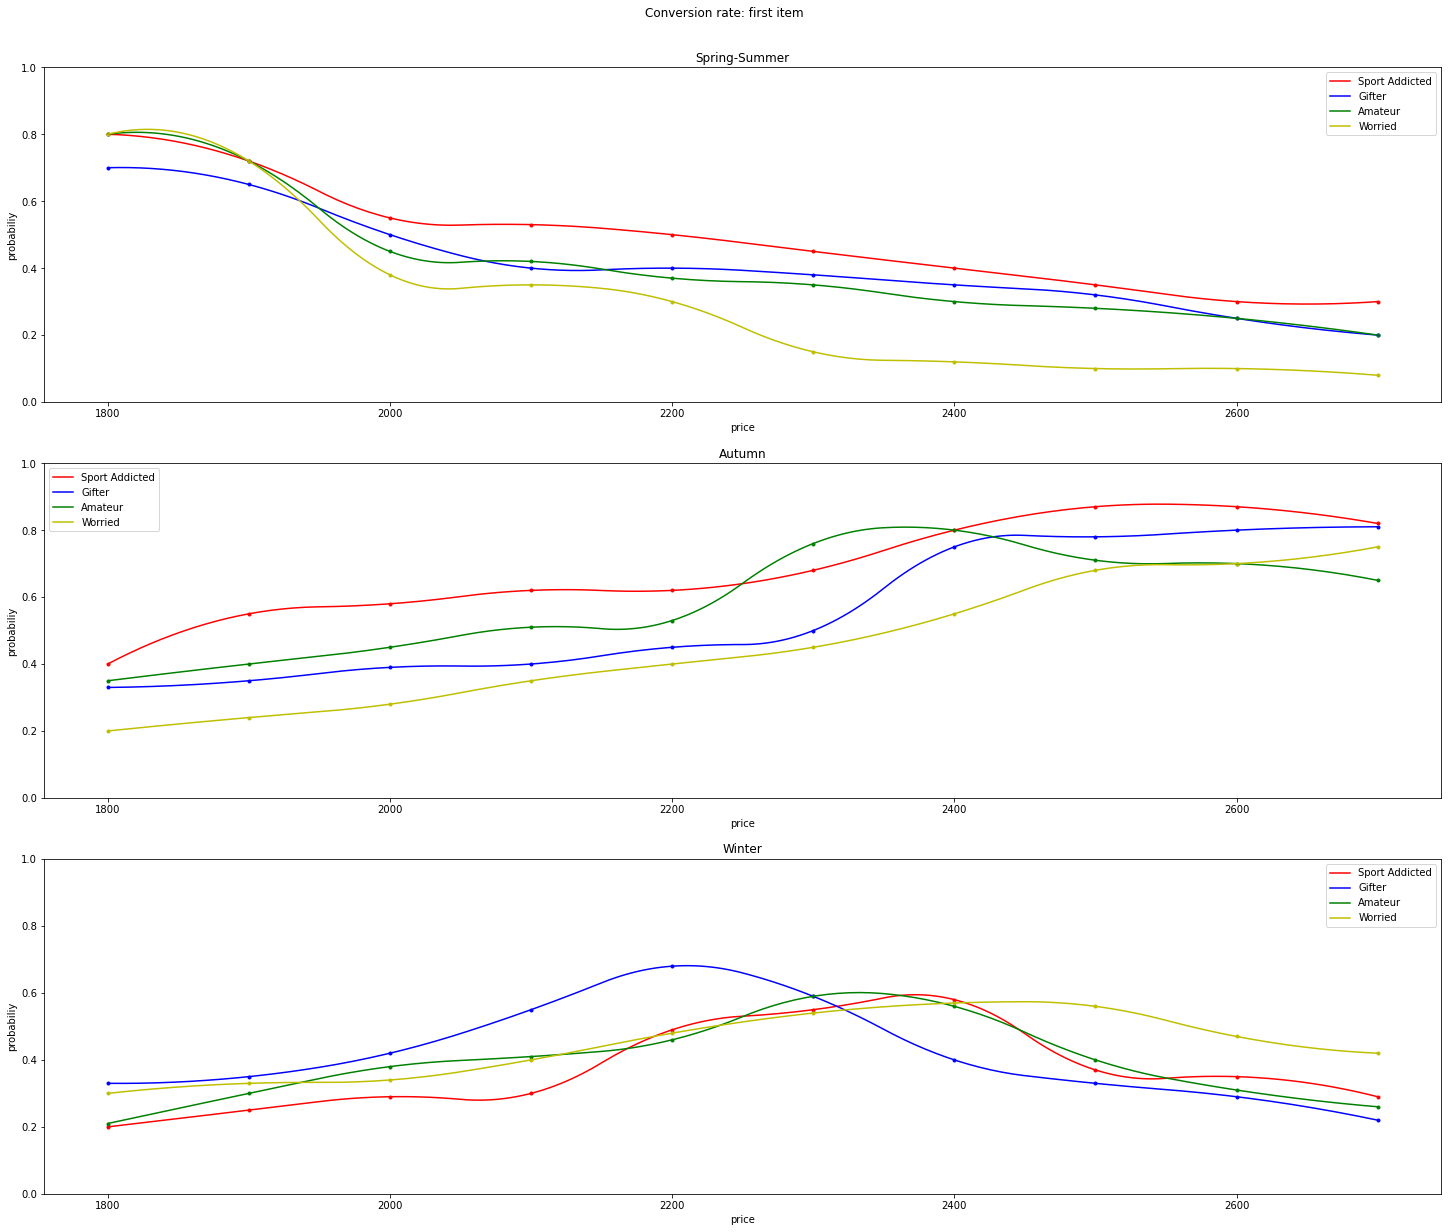

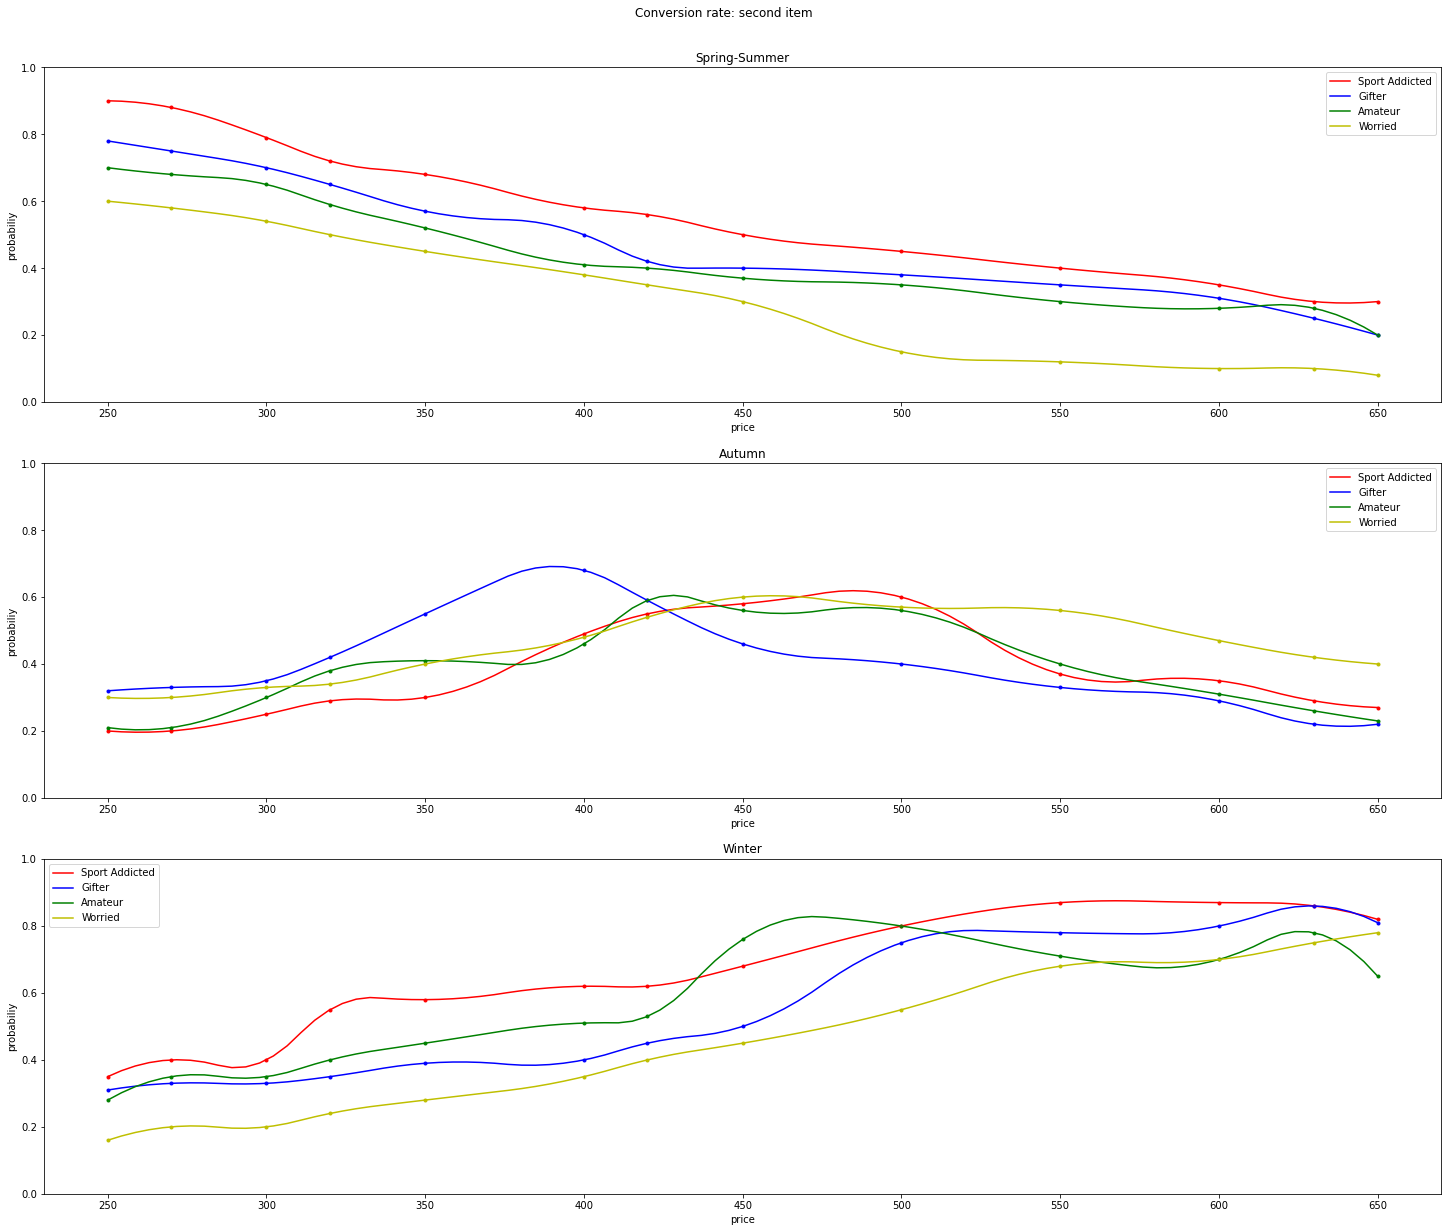

In [3]:
ctx.plot_item1_conversion_rate()
ctx.plot_item2_conversion_rate()

## From offline to online learning
Our general approach for the online problem is to simulate, day by day, the shop, generating the customers and emulating their behaviors, collecting the results and, according to the considered scenario and constraints, provide an optimal solution
that maximize the reward.
Every day we retrieve the daily customer distribution per class using the previously presented random variable that model the daily customer distribution. Randomly we simulate the entry of a new customer, of which we know the category of belonging,
in the shop. With an online approach we select the best price to be prosed to the client, in order to maximize the overall reward. The purchase is simulated with the previously presented random variable with a Bernulli distribution. The second item
is proposed to the client only if the first has been purchased. The price at which it is proposed is retrieved with an online matching approach that try to sugget which is the best discount to apply to the user in oreder to maximize the reward.
This procedure is repeated for all clients during the entire time horizon of 365 days.

**Important assumptions**
* Seasonality is taken into accout only for the 7$^{th}$, 8$^{th}$ requests, while for all the other, the seasonality of the products is not considered and the conversion rates remain static. For this requests the default season is the first one, in our context called Spring-Summer.
* In our mathematical formulation, for the total reward maximization problem, we consider the production cost of both the items equal to zero.
* For the first step the objective of promo assignment is to find the best values for the fractions of clients of the various category that receive a specific promotion. In the next steps, instead, we use online learning algorithm to find the best combination for the assignment promotion-category.

## Step 3

Consider the case in which the assignment of promos is fixed and the price of the second item is fixed and the goal is to learn the optimal price of the first item. Assume that the number of users per class is known as well as the conversion rate associated with the second item. Also assume that the prices are the same for all: the classes (assume the same in the following) and that the conversion rates do not change unless specified differently below. Adopt both an upper-confidence bound approach and a Thompson-sampling approach and compare their performance.


___________________
| Day: 1 - Experiment 1
| Today customers distribution : [164, 291, 411, 264]
| Customer #1 of category: Category-3: 
|	[UCB] - Item-1 : 1910.0 €, Item-2 : 630.0 € -> Total reward : 2086.4 €
|	[TS] - Item-1 : 2260.0 €, Item-2 : 630.0 € -> Total reward : 2436.4 €
|	[OPT] - Item-1 : 1910.0 €, Item-2 : 630.0 € -> Total reward : 2086.4 €
the rest of the clients are not printed....
___________________
| Day: 1 - Experiment 11
| Today customers distribution : [136, 229, 466, 308]
| Customer #1 of category: Category-1: 
|	[UCB] - Item-1 : 1910.0 €, Item-2 : 504.0 € -> Total reward : 2134.98 €
|	[TS] - Item-1 : 2130.0 €, Item-2 : 504.0 € -> Total reward : 0 €
|	[OPT] - Item-1 : 1910.0 €, Item-2 : 504.0 € -> Total reward : 2134.98 €
the rest of the clients are not printed....
___________________
| Day: 1 - Experiment 20
| Today customers distribution : [159, 185, 334, 218]
| Customer #1 of category: Category-4: 
|	[UCB] - Item-1 : 1910.0 €, Item-2 : 441.0 € -> Total reward :

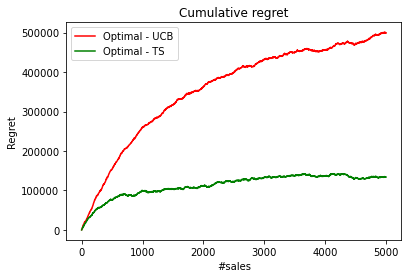

In [7]:
from Context import *    
import matplotlib.pyplot as plt
import numpy as np
from Algorithms.TS_Learner import *
from Algorithms.UCB1_Learner import * 

ctx= Context()
item2_price_full = ctx.item2_full_price # default is 
promotion_assignment = [2,1,0,3]   # class1: P2; class2:P1; class3:P0; class4:P3. is the optimal solution found with n1.py

discounted_price = ctx.discuonted_second_item_prices(promotion_assignment) # retrun the discounted prices for every customer category, according to the pormotion assignment

conversion_rate_second = np.zeros((4))
for i in range(4):
   conversion_rate_second[i] = ctx.conversion_rate_second_element(discounted_price[i],i)

# define the prices candidates for the first item
candidates_item1 = [2260.0,1910.0,2130.0, 2010.0, 2340.0]

days = 10
n_exp = 20
observation = (days//2)*1000
ts_experiments = np.zeros((n_exp,observation))
ucb_experiments = np.zeros((n_exp,observation))
opt_experiments = np.zeros((n_exp,observation))
for e in range(n_exp):
    ts_learner = TS_Learner(len(candidates_item1))
    ucb_learner = UCB1_Learner(len(candidates_item1))
    
    ts_reward = []  # collects the rewards of the clients with the TS strategy
    ucb_reward = [] # collects the rewards of the clients with the UCB strategy
    opt_reward = [] # collects the rewards of the clients with the optiml strategy
    
    maximum_rewards = ( max(candidates_item1) + max(discounted_price)) # parameter used to normalize the reward
    for d in range(days):

        # extract the daily customer. It is known
        customer_per_class = ctx.customers_daily_instance()
        daily_customer_weight = customer_per_class.copy()
        tot_client=sum(customer_per_class)

        # simulate the day client by client, proposing the first item at the price provided by teh learner
        for customer in range(tot_client):

            ts_customer_reward  = 0 
            ucb_customer_reward = 0
            opt_customer_reward = 0
            
            # ask to the learner to pull the most promising price that maximize the reward
            ts_pulled_arm = ts_learner.pull_arm()
            ucb_pulled_arm = ucb_learner.pull_arm()
            # extraction of a client 
            category = np.random.choice(np.nonzero(customer_per_class)[0])
            customer_per_class[category] -= 1

            # propose the item1 with the price suggested by the learner
            ts_buy_or_not_item1 = ctx.purchase_online_first_element(candidates_item1[ts_pulled_arm],category) 
            ucb_buy_or_not_item1 = ctx.purchase_online_first_element(candidates_item1[ucb_pulled_arm],category)
            opt_buy_or_not_item1 = ctx.purchase_online_first_element(min(candidates_item1),category)
            
            # the profit from the sale of the first item is added to the estimation of the rewenue that the customer buy the second item (depend only form the user category) 
            if ts_buy_or_not_item1:
                ts_customer_reward=candidates_item1[ts_pulled_arm] + conversion_rate_second[category]*discounted_price[category]
            if ucb_buy_or_not_item1:
                ucb_customer_reward=candidates_item1[ucb_pulled_arm] + conversion_rate_second[category]*discounted_price[category]
            if (opt_buy_or_not_item1):
                opt_customer_reward = min(candidates_item1) + conversion_rate_second[category]*discounted_price[category]
                
            # for each customer update the learner normalizing the reward
            ts_learner.update(ts_pulled_arm,ts_customer_reward/maximum_rewards)
            ucb_learner.update(ucb_pulled_arm,ucb_customer_reward/maximum_rewards)
            if(customer==1 and (e==0 or e==10 or e==19) and d==0):
                print('___________________')
                print(f'| Day: {d+1} - Experiment {e+1}')
                print(f'| Today customers distribution : {daily_customer_weight}')
                print(f'| Customer #{customer} of category: {ctx.classes_info[category]["name"]}: ')
                print(f'|\t[UCB] - {ctx.items_info[0]["name"]} : {candidates_item1[ucb_pulled_arm]} €, {ctx.items_info[1]["name"]} : {discounted_price[category]} € -> Total reward : {round(ucb_customer_reward,2)} €')
                print(f'|\t[TS] - {ctx.items_info[0]["name"]} : {candidates_item1[ts_pulled_arm]} €, {ctx.items_info[1]["name"]} : {discounted_price[category]} € -> Total reward : {round(ts_customer_reward,2)} €')
                print(f'|\t[OPT] - {ctx.items_info[0]["name"]} : {min(candidates_item1)} €, {ctx.items_info[1]["name"]} : {discounted_price[category]} € -> Total reward : {round(opt_customer_reward,2)} €')
                print("the rest of the clients are not printed....")
            # collect all the rewards
            ts_reward.append(ts_customer_reward)
            ucb_reward.append(ucb_customer_reward)
            opt_reward.append(opt_customer_reward)
                       
    # end experiment. save only the first <observation> value
    ts_experiments[e,:] = ts_reward[:observation]
    ucb_experiments[e,:]= ucb_reward[:observation]
    opt_experiments[e,:]= opt_reward[:observation]
    
    
plt.figure(1)
plt.xlabel("#sales")
plt.ylabel("Regret")
plt.plot(np.mean(np.cumsum(opt_experiments,axis=1),axis=0)-np.mean(np.cumsum(ucb_experiments,axis=1),axis=0),'-', color='red', label = 'Optimal - UCB')
plt.plot(np.mean(np.cumsum(opt_experiments,axis=1),axis=0)-np.mean(np.cumsum(ts_experiments,axis=1),axis=0),'-', color='green', label = 'Optimal - TS')
plt.title("Cumulative regret")
plt.legend()

plt.show()



        


We have limited the time horizon of this step for readibilty reasons.

As we can observe in the plot, both the approaches converge to a stable solution, however Thompson Sampling approach performs better than a UCB approach. Infact Thompson Sampling is faster to find the best price for the first item than UCB and this allow to have a lower regret. 

## Step 4

Do the same as Step 3 when instead the conversion rate associated with the second item is not known. Also assume that the number of customers per class is not known.


___________________
| Day: 1 - Experiment 1
| Today customers distribution : [147, 145, 411, 186]
| Customer #1 of category: Category-2: 
|	[UCB] - Item-1 : 1910.0 €, Item-2 : 567.0 € -> Total reward : 1910.0 €
|	[TS] - Item-1 : 2130.0 €, Item-2 : 567.0 € -> Total reward : 2130.0 €
|	[OPT] - Item-1 : 1910.0 €, Item-2 : 567.0 € -> Total reward : 1910.0 €
the rest of the clients are not printed....
___________________
| Day: 1 - Experiment 11
| Today customers distribution : [172, 206, 474, 245]
| Customer #1 of category: Category-4: 
|	[UCB] - Item-1 : 1910.0 €, Item-2 : 441.0 € -> Total reward : 1910.0 €
|	[TS] - Item-1 : 2010.0 €, Item-2 : 441.0 € -> Total reward : 0 €
|	[OPT] - Item-1 : 1910.0 €, Item-2 : 441.0 € -> Total reward : 1910.0 €
the rest of the clients are not printed....
___________________
| Day: 1 - Experiment 20
| Today customers distribution : [93, 184, 473, 166]
| Customer #1 of category: Category-2: 
|	[UCB] - Item-1 : 1910.0 €, Item-2 : 567.0 € -> Total reward : 19

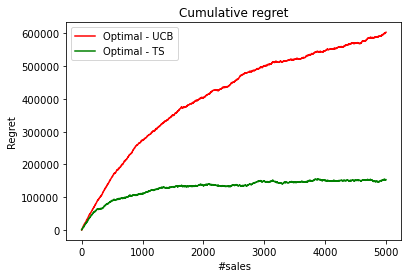

In [9]:
from Context import *    
import matplotlib.pyplot as plt
import numpy as np
from Algorithms.TS_Learner import *
from Algorithms.UCB1_Learner import * 

ctx= Context()
item2_price_full = ctx.item2_full_price # default is 
promotion_assignment = [2,1,0,3]   # class1: P2; class2:P1; class3:P0; class4:P3. is the optimal solution found with n1.py


discounted_price = ctx.discuonted_second_item_prices(promotion_assignment) # retrun the discounted prices for every customer category, according to the pormotion assignment

# define the prices candidates for the first item
candidates_item1 = [2260.0,1910.0,2130.0, 2010.0, 2340.0]

days = 10
n_exp = 20
observation = (days//2)*1000

ts_experiments = np.zeros((n_exp,observation))
ucb_experiments = np.zeros((n_exp,observation))
opt_experiments = np.zeros((n_exp,observation))
for e in range(n_exp):
    ts_learner = TS_Learner(len(candidates_item1))
    ucb_learner = UCB1_Learner(len(candidates_item1))
    
    ts_reward = []
    ucb_reward = []
    opt_reward = []
    
    maximum_rewards = max(candidates_item1) + max(discounted_price) # parameter used to normalize the reward
    for d in range(days):
        # extract the daily customer. It is UNKNOWN
        customer_per_class = ctx.customers_daily_instance() 
        daily_customer_weight = customer_per_class.copy()
               
        tot_client=sum(customer_per_class)
        # simulate the day client by client, proposing the first item at the price provided by teh learner
        for customer in range(tot_client):
            
                    
            ts_customer_reward  = 0 
            ucb_customer_reward = 0
            opt_customer_reward = 0
            
            # ask to the learner to pull the most promising price that maximize the reward
            ts_pulled_arm = ts_learner.pull_arm()
            ucb_pulled_arm = ucb_learner.pull_arm()
            # extraction of a client 
            category = np.random.choice(np.nonzero(customer_per_class)[0])
            customer_per_class[category] -= 1

            # propose the item1 with the price suggested by the learner
            ts_buy_or_not_item1 = ctx.purchase_online_first_element(candidates_item1[ts_pulled_arm],category) 
            ucb_buy_or_not_item1 = ctx.purchase_online_first_element(candidates_item1[ucb_pulled_arm],category)
            opt_buy_or_not_item1 = ctx.purchase_online_first_element(min(candidates_item1),category)
            
            # the profit is computed after proposing to the customer the second item at the discounted price 
            if ts_buy_or_not_item1:
                ts_customer_reward = candidates_item1[ts_pulled_arm] + ctx.purchase_online_second_element(discounted_price[category],category)*discounted_price[category]
            if ucb_buy_or_not_item1:
                ucb_customer_reward = candidates_item1[ucb_pulled_arm] + ctx.purchase_online_second_element(discounted_price[category],category)*discounted_price[category]
            if (opt_buy_or_not_item1):
                opt_customer_reward = min(candidates_item1) + ctx.purchase_online_second_element(discounted_price[category],category)*discounted_price[category]

            # update the learner normilizing the reward
            ts_learner.update(ts_pulled_arm,ts_customer_reward/maximum_rewards)
            ucb_learner.update(ucb_pulled_arm,ucb_customer_reward/maximum_rewards)
            if(customer==1 and (e==0 or e==10 or e==19) and d==0):
                print('___________________')
                print(f'| Day: {d+1} - Experiment {e+1}')
                print(f'| Today customers distribution : {daily_customer_weight}')
                print(f'| Customer #{customer} of category: {ctx.classes_info[category]["name"]}: ')
                print(f'|\t[UCB] - {ctx.items_info[0]["name"]} : {candidates_item1[ucb_pulled_arm]} €, {ctx.items_info[1]["name"]} : {discounted_price[category]} € -> Total reward : {round(ucb_customer_reward,2)} €')
                print(f'|\t[TS] - {ctx.items_info[0]["name"]} : {candidates_item1[ts_pulled_arm]} €, {ctx.items_info[1]["name"]} : {discounted_price[category]} € -> Total reward : {round(ts_customer_reward,2)} €')
                print(f'|\t[OPT] - {ctx.items_info[0]["name"]} : {min(candidates_item1)} €, {ctx.items_info[1]["name"]} : {discounted_price[category]} € -> Total reward : {round(opt_customer_reward,2)} €')
                print("the rest of the clients are not printed....")
            # collect all the rewards
            ts_reward.append(ts_customer_reward)
            ucb_reward.append(ucb_customer_reward)
            opt_reward.append(opt_customer_reward)

            
        
    # end experiment. save only the first <observation> value
    ts_experiments[e,:] = ts_reward[:observation]
    ucb_experiments[e,:]= ucb_reward[:observation]
    opt_experiments[e,:]= opt_reward[:observation]


plt.figure(1)
plt.xlabel("#sales")
plt.ylabel("Regret")
plt.plot(np.mean(np.cumsum(opt_experiments,axis=1),axis=0)-np.mean(np.cumsum(ucb_experiments,axis=1),axis=0),'-', color='red', label = 'Optimal - UCB')
plt.plot(np.mean(np.cumsum(opt_experiments,axis=1),axis=0)-np.mean(np.cumsum(ts_experiments,axis=1),axis=0),'-', color='green', label = 'Optimal - TS')
plt.title("Cumulative regret")
plt.legend()

plt.show()

As in the previous step we are running we are considering a reduced time horizon.

The result shows that a Thompson Sampling approach performs better than a UCB approach, as in the previous problem. The regret curves of both the algorithm are slightly higher than the previous scenario, because, unlike the previous case, we do not know the conversion rates associated to the second item so we have a less precise value that will feed the two leaner, increasing the inaccurancy of the estimations.  

## Step 5

Consider the case in which prices are fixed, but the assignment of promos to users need to be optimized by using an assignment algorithm. All the parameters need to be learnt.



#############

 Item-1: 1980.0 €
 Item-2: 630.0 €
 Discouts (%): [0.0, 10.0, 20.0, 30.0]
 Discounted Item-2: [630.0, 567.0, 504.0, 441.0] €
___________________
| Day: 1 - Experiment 1
| Today customers distribution : [134, 149, 394, 210]
| Customer #1 of category: Category-1: 
/ <sub matching> : [[0, 1, 2, 3], (0, 1, 3, 2)]
\ <opt matching> : (array([0, 1, 2, 3], dtype=int64), array([2, 1, 0, 3], dtype=int64))
| UCB propose: 630.0 -- Opt propose: 504.0
| UCB reward: 630.0 -- Opt reward: 0.0
| Loss: -630.0 €
the rest of the clients are not printed....
___________________
| Day: 1 - Experiment 3
| Today customers distribution : [66, 204, 378, 298]
| Customer #1 of category: Category-2: 
/ <sub matching> : [[0, 1, 2, 3], (0, 1, 3, 2)]
\ <opt matching> : (array([0, 1, 2, 3], dtype=int64), array([2, 1, 0, 3], dtype=int64))
| UCB propose: 567.0 -- Opt propose: 567.0
| UCB reward: 0.0 -- Opt reward: 567.0
| Loss: 567.0 €
the rest of the clients are not printed....


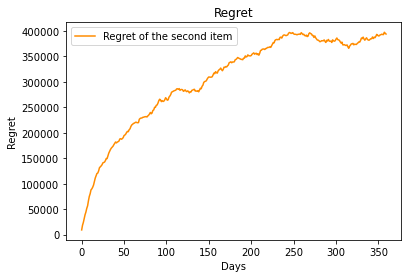

In [13]:
from Context import *    
import matplotlib.pyplot as plt
from Algorithms.UCB_Matching import *
from Algorithms.promo_category_UCB_learner import *

ctx= Context()

days = 360 # 365 days of simulations
n_exp = 15 # experimet parameters

item1_price_full = 1980.0
item2_price_full = 630.0 

#discount for the second item 
discounted_price = [item2_price_full,
    item2_price_full*(1-ctx.discount_promos[1]),
    item2_price_full*(1-ctx.discount_promos[2]),
    item2_price_full*(1-ctx.discount_promos[3])]

print("\n\n#############\n")
print(f" {ctx.items_info[0]['name']}: {item1_price_full} €\n {ctx.items_info[1]['name']}: {item2_price_full} €\n Discouts (%): {[_*100 for _ in ctx.discount_promos]}")
print(f" Discounted {ctx.items_info[1]['name']}: {discounted_price} €")

# Computing an optimal solution to be compared with the online solutions
# Is computed using a matching algorithom on a matrix that takes into account the price and conversion rate for the second items, according to the user category and the discount
priced_conversion_rate_second = np.zeros((4,4))
for i in range (0,4): #classes
    for j in range (0,4): #promos
        priced_conversion_rate_second[i,j] = ctx.conversion_rate_second_element(discounted_price[j], i) * discounted_price[j]
opt = linear_sum_assignment(priced_conversion_rate_second, maximize=True) # optimal solution row_ind, col_ind

#
# ONLINE LEARNING AND SIMULATION
#
days_experiments = np.zeros((n_exp,days))
for e in range(n_exp):
    day_UCB_reward = [] 
    day_opt_reward = []

    learner = promo_category_UCB_learner(priced_conversion_rate_second.size, *priced_conversion_rate_second.shape, 1000 ,item2_price_full) # Initialize UCB matching learner
    for d in range(days): # Day simulation
        # generate daily customers according the Context distributions, divided in categories
        daily_customer = ctx.customers_daily_instance()
        daily_customer_weight=daily_customer.copy()

        daily_cum_UCB_rewards = 0
        daily_cum_opt_rewards = 0

        tot_client=sum(daily_customer)
        for customer in range(tot_client): # for each category emulate the user that purchase the good 
            customer_UCB_reward = 0
            customer_opt_reward = 0
            customer_item1_reward = 0

            category = np.random.choice(np.nonzero(daily_customer)[0])
            daily_customer[category] -= 1

            # Purchase simulation of the first item at fixed price
            buy_or_not_item1 = ctx.purchase_online_first_element(item1_price_full,category) 
            customer_item1_reward = buy_or_not_item1 * item1_price_full
            # Propose the second item only if the first one was bought
            if buy_or_not_item1:
                # Query the learner to know wath is the best matching strategy category-promotion 
                sub_matching = learner.pull_arm() # suboptimal matching. row_ind, col_ind
                
                propose_price = discounted_price[sub_matching[1][category]]
                # Propose the second item to the user, using the promotion retrieved by the learner (according to the user category)                    
                buy_or_not_item2 = ctx.purchase_online_second_element(propose_price,category) # 0: not purchased, 1: purchased

                # compute rewards 
                customer_UCB_reward = buy_or_not_item2 * propose_price
                customer_opt_reward = ctx.purchase_online_second_element(discounted_price[opt[1][category]],category) * discounted_price[opt[1][category]] # purchase of the second item according to the optimal strategy 

                #update the learner
                learner.update(sub_matching,customer_UCB_reward,category=category)
                if(customer==1 and (e==0 or e==2) and (d==0 or d==200)):
                    print('___________________')
                    print(f'| Day: {d+1} - Experiment {e+1}')
                    print(f'| Today customers distribution : {daily_customer_weight}')
                    print(f'| Customer #{customer} of category: {ctx.classes_info[category]["name"]}: ')
                    print(f'/ <sub matching> : {sub_matching}')
                    print(f'\ <opt matching> : {opt}')
                    print(f'| UCB propose: {propose_price} -- Opt propose: {discounted_price[opt[1][category]]}')
                    print(f'| UCB reward: {customer_UCB_reward} -- Opt reward: {customer_opt_reward}')
                    print(f'| Loss: {customer_opt_reward - customer_UCB_reward} €')
                    print("the rest of the clients are not printed....")
            daily_cum_UCB_rewards += customer_UCB_reward
            daily_cum_opt_rewards += customer_opt_reward

        day_UCB_reward.append(daily_cum_UCB_rewards)
        day_opt_reward.append(daily_cum_opt_rewards)

    days_experiments[e,:] = np.cumsum(day_opt_reward) - np.cumsum(day_UCB_reward)


# ploting results
plt.figure(1)
plt.xlabel("Days")
plt.ylabel("Regret")
plt.plot(np.mean(days_experiments,axis=0),'-', color='darkorange', label = 'Regret of the second item')
plt.title("Regret")
plt.legend()
plt.show()
        
    

We can observe that the UCB Matching algorithm has a linear increase on thecumulative regret for the first thirty days, but after that, it becomes more and morestable on the optimal matching, and the cumulative regret does not increase somuch.

## Step 6

Consider the general case in which the shop needs to optimize the prices and the assignment of promos to the customers in the case all the parameters need to be learnt.

___________________
| Day: 1 - Experiment 1
| Today customers distribution : [137, 217, 383, 275]
| Customer #1 of category: Gifter: 
| cus_price_item1 = 2110.0 --- cus_price_item2 = 410.0
| opt_price_item1 = 1900.0 --- opt_price_item2 = 410.0
/ <sub matching> : [[0, 1, 2, 3], (0, 1, 2, 3)] --> round(cus_price_item2_discounted,2) = 369.0
\ <opt matching> : (array([0, 1, 2, 3], dtype=int64), array([0, 2, 3, 1], dtype=int64)) --> round(opt_price_item2_discounted,2) = 328.0
the rest of the clients are not printed....
___________________
| Day: 201 - Experiment 1
| Today customers distribution : [128, 182, 403, 206]
| Customer #1 of category: Worried: 
| cus_price_item1 = 1900.0 --- cus_price_item2 = 360.0
| opt_price_item1 = 1900.0 --- opt_price_item2 = 410.0
/ <sub matching> : (array([0, 1, 2, 3], dtype=int64), array([0, 1, 2, 3], dtype=int64)) --> round(cus_price_item2_discounted,2) = 252.0
\ <opt matching> : (array([0, 1, 2, 3], dtype=int64), array([0, 2, 3, 1], dtype=int64)) --> round

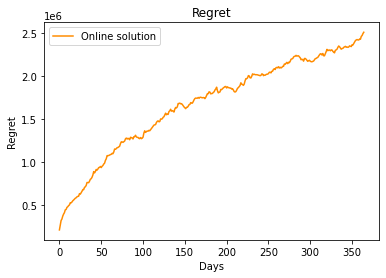

In [1]:
from Context import *    
import matplotlib.pyplot as plt
from Algorithms.promo_category_UCB_learner import *
from Algorithms.TS_Learner import *

ctx = Context()
days = 365 # 365 days of simulations
n_exp = 10

# define the prices candidates for the first and second item
candidates_item1 = [2110.0, 1900.0, 2420.0, 2690.0]
candidates_item2 = [360.0, 410.0, 530.0, 600.0]

# optimal solution for the seasoson with this candidates
opt_prices,opt_matching, best_daily_reward = ctx.correlated_optimal_solution(candidates_item1,candidates_item2,season=0) # return  best_prices[p1,p2],best_matching, best_reward
opt_price_item1 = opt_prices[0]
opt_price_item2 = opt_prices[1]

v_cus_experimets = np.zeros((n_exp,days))
for e in range(n_exp):
    # LEARNERS
    ts_learner = TS_Learner(len(candidates_item1) * len(candidates_item2)) # superarm of couple price_item1, price_item2: <p1,p2>
    normalizing_value = max(candidates_item1) + max(candidates_item2) # value used to normalize the customer reward, used to update the learner
    # UCB Matching learner, one learner for each couple <p1,p2>
    matching_learners = [promo_category_UCB_learner(np.zeros((4,4)).size, *np.zeros((4,4)).shape, 1000 ,max(candidates_item2)) for _ in range(len(candidates_item1) * len(candidates_item2))]
    v_daily_cus_reward = []
    v_daily_opt_reward = []
    for d in range(days):
        # extract the daily customer. It is UNKNOWN
        customer_per_class = ctx.customers_daily_instance() 
        daily_customer_weight = customer_per_class.copy()
        tot_client = sum(customer_per_class)
        daily_cus_reward = 0.0
        daily_opt_reward = 0.0
        # simulate the day client by client
        for customer in range(tot_client):
            customer_reward_item1 = 0.0
            customer_reward_item2 = 0.0
            opt_customer_reward_item1 = 0.0 # opt reward
            opt_customer_reward_item2 = 0.0 # opt reward

            category = np.random.choice(np.nonzero(customer_per_class)[0])
            customer_per_class[category] -= 1

            # ask to the learner to pull the most promising couple <p1,p2> that maximize the reward
            ts_pulled_arm = ts_learner.pull_arm() # number between 0..24
            cus_price_item1 = candidates_item1[ts_pulled_arm // len(candidates_item1)]
            cus_price_item2 = candidates_item2[ts_pulled_arm % len(candidates_item2)]

            # query the corresponding superarm learner 
            sub_matching = matching_learners[ts_pulled_arm].pull_arm() # suboptimal matching. row_ind, col_ind
            cus_price_item2_discounted = cus_price_item2 * (1-ctx.discount_promos[ sub_matching[1][category] ])
            opt_price_item2_discounted = opt_price_item2 * (1-ctx.discount_promos[ opt_matching[1][category] ])
            # purchase simulations
            cus_buy_or_not_item1 = ctx.purchase_online_first_element(cus_price_item1,category) 
            opt_buy_or_not_item1 = ctx.purchase_online_first_element(opt_price_item1,category)
            cus_buy_or_not_item2 = 0
            opt_buy_or_not_item2 = 0

            # compute the rewenue of the first and second item for both optimal solution and the online learning
            if cus_buy_or_not_item1:
                cus_buy_or_not_item2 = ctx.purchase_online_second_element(cus_price_item2_discounted, category) 
            if opt_buy_or_not_item1:
                opt_buy_or_not_item2 = ctx.purchase_online_second_element(opt_price_item2_discounted, category) 
            # computing rewards
            customer_reward_item1 = cus_buy_or_not_item1 * cus_price_item1
            customer_reward_item2 = cus_buy_or_not_item2 * cus_price_item2_discounted
            opt_customer_reward_item1 = opt_buy_or_not_item1 * opt_price_item1
            opt_customer_reward_item2 = opt_buy_or_not_item2 * opt_price_item2_discounted

            # update learners
            ts_learner.update(ts_pulled_arm, (customer_reward_item1 + customer_reward_item2 )/normalizing_value)
            if cus_buy_or_not_item1:
                matching_learners[ts_pulled_arm].update(sub_matching, customer_reward_item2, category=category)
            if(customer==1 and (e==0 or e==2) and (d==0 or d==200)):
                print('___________________')
                print(f'| Day: {d+1} - Experiment {e+1}')
                print(f'| Today customers distribution : {daily_customer_weight}')
                print(f'| Customer #{customer} of category: {ctx.classes_info[category]["name"]}: ')
                print(f'| {cus_price_item1 = } --- {cus_price_item2 = }')
                print(f'| {opt_price_item1 = } --- {opt_price_item2 = }')
                print(f'/ <sub matching> : {sub_matching} --> {round(cus_price_item2_discounted,2) = }')
                print(f'\ <opt matching> : {opt_matching} --> {round(opt_price_item2_discounted,2) = }')
                print("the rest of the clients are not printed....")

            # storing rewards
            daily_cus_reward += (customer_reward_item1 + customer_reward_item2 )
            daily_opt_reward += (opt_customer_reward_item1 + opt_customer_reward_item2 )
        v_daily_cus_reward.append(daily_cus_reward)
        v_daily_opt_reward.append(daily_opt_reward)
    v_cus_experimets[e:] = np.cumsum(v_daily_opt_reward) - np.cumsum(v_daily_cus_reward)


# ploting results
plt.figure(1)
plt.xlabel("Days")
plt.ylabel("Regret")
plt.plot(np.mean(v_cus_experimets,axis=0),'-', color='darkorange', label = 'Online solution')
plt.title("Regret")
plt.legend()
plt.show()

We can notice that the learners take more time to learn the optimal solutions both for
pricing and matching. The cumulative regret is increasing quite linearly until the day
200th, after that, they start to stabilize on the optimal solutions. The cumulative
regret still be jagged, because both the learner can pull random arms with some
probabilty, this has impact on the curve.

## Step 7

Do the same as Step 6 when the conversion rates are not stationary. Adopt a sliding-window approach.


___________________
| Day: 1 - Experiment 1
| Today customers distribution : [160, 206, 388, 272]
| Customer #1 of category: Gifter: 
| cus_swts_price_item1 = 1900.0 --- cus_swts_price_item2 = 360.0
| cus_ts_price_item1 = 1900.0 --- cus_ts_price_item2 = 530.0
| opt_price_item1 = 1900.0 --- opt_price_item2 = 410.0
/ <swts matching> : [[0, 1, 2, 3], (0, 1, 2, 3)] --> round(cus_swts_price_item2_discounted,2) = 324.0
/ <ts   matching> : [[0, 1, 2, 3], (0, 1, 2, 3)] --> round(cus_ts_price_item2_discounted,2) = 477.0
\ <opt  matching> : (array([0, 1, 2, 3], dtype=int64), array([0, 2, 3, 1], dtype=int64)) --> round(opt_price_item2_discounted,2) = 328.0
the rest of the clients are not printed....
___________________
| Day: 201 - Experiment 1
| Today customers distribution : [104, 244, 403, 233]
| Customer #1 of category: Sport Addicted: 
| cus_swts_price_item1 = 2690.0 --- cus_swts_price_item2 = 600.0
| cus_ts_price_item1 = 2420.0 --- cus_ts_price_item2 = 530.0
| opt_price_item1 = 2690.0 --- o

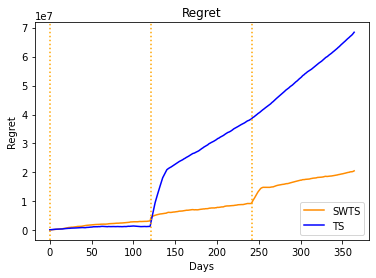

In [2]:
from Context import *    
import matplotlib.pyplot as plt
from Algorithms.promo_category_UCB_learner import *
from Algorithms.TS_Learner import *
from Algorithms.SWTS_Learner import *

ctx = Context()
days = 365 # 365 days of simulations
n_exp = 3
seasonality = [0*(days//3), 1*(days//3), 2*(days//3)] # days at which the new season start
window_size = int(np.sqrt(days*1000) * 30)
season = 0

# define the prices candidates for the first and second item
candidates_item1 = [2110.0, 1900.0, 2420.0, 2690.0]
candidates_item2 = [360.0, 410.0, 530.0, 600.0]

# retrieve optimal solution for the seasoson with this candidates
opt_prices,opt_matching, best_daily_reward = ctx.correlated_optimal_solution(candidates_item1,candidates_item2,season=0) # return  best_prices[p1,p2],best_matching, best_reward
opt_price_item1 = opt_prices[0]
opt_price_item2 = opt_prices[1]

v_swts_experimets = np.zeros((n_exp,days))
v_ts_experimets = np.zeros((n_exp,days))
for e in range(n_exp):
    # LEARNERS
    swts_learner = SWTS_Learner(len(candidates_item1) * len(candidates_item2), window_size)
    ts_learner = TS_Learner(len(candidates_item1) * len(candidates_item2)) # superarm of couple price_item1, price_item2: <p1,p2>
    normalizing_value = max(candidates_item1) + max(candidates_item2) # value used to normalize the customer reward, used to update the learner
    # UCB Matching learner, one learner for each couple <p1,p2>
    matching_swts_learners = [promo_category_UCB_learner(np.zeros((4,4)).size, *np.zeros((4,4)).shape, 1000 ,max(candidates_item2)) for _ in range(len(candidates_item1) * len(candidates_item2))]
    matching_ts_learners = [promo_category_UCB_learner(np.zeros((4,4)).size, *np.zeros((4,4)).shape, 1000 ,max(candidates_item2)) for _ in range(len(candidates_item1) * len(candidates_item2))]
    v_daily_swts_reward = []
    v_daily_ts_reward = []
    v_daily_opt_reward = []

    for d in range(days):
        # extract the daily customer. It is UNKNOWN
        customer_per_class = ctx.customers_daily_instance() 
        daily_customer_weight = customer_per_class.copy()
        tot_client = sum(customer_per_class)
        daily_swts_reward = 0.0
        daily_ts_reward = 0.0
        daily_opt_reward = 0.0
        if d in seasonality: # new season begin, reset the matching_learner
            season = seasonality.index(d)
            #matching_swts_learners = [promo_category_UCB_learner(np.zeros((4,4)).size, *np.zeros((4,4)).shape, 1000 ,max(candidates_item2)) for _ in range(len(candidates_item1) * len(candidates_item2))]
            #matching_ts_learners = [promo_category_UCB_learner(np.zeros((4,4)).size, *np.zeros((4,4)).shape, 1000 ,max(candidates_item2)) for _ in range(len(candidates_item1) * len(candidates_item2))]
            # retrieve optimal solution for the seasoson with this candidates
            opt_prices,opt_matching, best_daily_reward = ctx.correlated_optimal_solution(candidates_item1,candidates_item2,season=season) # return  best_prices[p1,p2],best_matching, best_reward
            opt_price_item1 = opt_prices[0]
            opt_price_item2 = opt_prices[1]
        
        # simulate the day client by client
        for customer in range(tot_client):
            cus_swts_reward_item1 = 0.0
            cus_swts_reward_item2 = 0.0
            cus_ts_reward_item1 = 0.0
            cus_ts_reward_item2 = 0.0
            opt_customer_reward_item1 = 0.0 # opt reward
            opt_customer_reward_item2 = 0.0 # opt reward

            category = np.random.choice(np.nonzero(customer_per_class)[0])
            customer_per_class[category] -= 1

            # ask to the learner to pull the most promising couple <p1,p2> that maximize the reward
            # SWTS
            swts_pulled_arm = swts_learner.pull_arm() # number between 0..24
            cus_swts_price_item1 = candidates_item1[swts_pulled_arm // len(candidates_item1)]
            cus_swts_price_item2 = candidates_item2[swts_pulled_arm % len(candidates_item2)]
            # TS
            ts_pulled_arm = ts_learner.pull_arm() # number between 0..24
            cus_ts_price_item1 = candidates_item1[ts_pulled_arm // len(candidates_item1)]
            cus_ts_price_item2 = candidates_item2[ts_pulled_arm % len(candidates_item2)]
            # query the corresponding superarm learner and compute the discounted price 
            # SWTS
            sub_swts_matching = matching_swts_learners[swts_pulled_arm].pull_arm() # suboptimal matching. row_ind, col_ind
            cus_swts_price_item2_discounted = cus_swts_price_item2 * (1-ctx.discount_promos[ sub_swts_matching[1][category] ])
            # TS
            sub_ts_matching = matching_ts_learners[ts_pulled_arm].pull_arm() # suboptimal matching. row_ind, col_ind
            cus_ts_price_item2_discounted = cus_ts_price_item2 * (1-ctx.discount_promos[ sub_ts_matching[1][category] ])
            # OPT
            opt_price_item2_discounted = opt_price_item2 * (1-ctx.discount_promos[ opt_matching[1][category] ])

            # purchase simulations
            cus_swts_buy_or_not_item1 = ctx.purchase_online_first_element(cus_swts_price_item1,category,season) 
            cus_ts_buy_or_not_item1 = ctx.purchase_online_first_element(cus_ts_price_item1,category,season)
            opt_buy_or_not_item1 = ctx.purchase_online_first_element(opt_price_item1,category,season)
            cus_swts_buy_or_not_item2 = 0
            cus_ts_buy_or_not_item2 = 0
            opt_buy_or_not_item2 = 0

            # compute the rewenue of the first and second item for both optimal solution and the online learning
            if cus_swts_buy_or_not_item1:
                cus_swts_buy_or_not_item2 = ctx.purchase_online_second_element(cus_swts_price_item2_discounted, category,season) 
            if cus_ts_buy_or_not_item1:
                cus_ts_buy_or_not_item2 = ctx.purchase_online_second_element(cus_ts_price_item2_discounted, category,season)
            if opt_buy_or_not_item1:
                opt_buy_or_not_item2 = ctx.purchase_online_second_element(opt_price_item2_discounted, category,season)
            
            # computing rewards
            cus_swts_reward_item1 = cus_swts_buy_or_not_item1 * cus_swts_price_item1
            cus_swts_reward_item2 = cus_swts_buy_or_not_item2 * cus_swts_price_item2_discounted
            cus_ts_reward_item1 = cus_ts_buy_or_not_item1 * cus_ts_price_item1
            cus_ts_reward_item2 = cus_ts_buy_or_not_item2 * cus_ts_price_item2_discounted
            opt_customer_reward_item1 = opt_buy_or_not_item1 * opt_price_item1
            opt_customer_reward_item2 = opt_buy_or_not_item2 * opt_price_item2_discounted

            # update learners
            swts_learner.update(swts_pulled_arm, (cus_swts_reward_item1 + cus_swts_reward_item2 )/normalizing_value)
            ts_learner.update(ts_pulled_arm, (cus_ts_reward_item1 + cus_ts_reward_item2 )/normalizing_value)
            if cus_swts_buy_or_not_item1:
                matching_swts_learners[swts_pulled_arm].update(sub_swts_matching, cus_swts_reward_item2, category=category)
            if cus_ts_buy_or_not_item1:
                matching_ts_learners[ts_pulled_arm].update(sub_ts_matching, cus_ts_reward_item2, category=category)
            if(customer==1 and (e==0 or e==2) and (d==0 or d==200)):
                print('___________________')
                print(f'| Day: {d+1} - Experiment {e+1}')
                print(f'| Today customers distribution : {daily_customer_weight}')
                print(f'| Customer #{customer} of category: {ctx.classes_info[category]["name"]}: ')
                print(f'| {cus_swts_price_item1 = } --- {cus_swts_price_item2 = }')
                print(f'| {cus_ts_price_item1 = } --- {cus_ts_price_item2 = }')
                print(f'| {opt_price_item1 = } --- {opt_price_item2 = }')
                print(f'/ <swts matching> : {sub_swts_matching} --> {round(cus_swts_price_item2_discounted,2) = }')
                print(f'/ <ts   matching> : {sub_ts_matching} --> {round(cus_ts_price_item2_discounted,2) = }')
                print(f'\ <opt  matching> : {opt_matching} --> {round(opt_price_item2_discounted,2) = }')
                print("the rest of the clients are not printed....")
            # storing rewards
            daily_swts_reward += (cus_swts_reward_item1 + cus_swts_reward_item2 )
            daily_ts_reward += (cus_ts_reward_item1 + cus_ts_reward_item2 )
            daily_opt_reward += (opt_customer_reward_item1 + opt_customer_reward_item2 )
        v_daily_swts_reward.append(daily_swts_reward)
        v_daily_ts_reward.append(daily_ts_reward)
        v_daily_opt_reward.append(daily_opt_reward)
    v_swts_experimets[e:] = np.cumsum(v_daily_opt_reward) - np.cumsum(v_daily_swts_reward)
    v_ts_experimets[e:] = np.cumsum(v_daily_opt_reward) - np.cumsum(v_daily_ts_reward)
                
# ploting results
plt.figure(1)
plt.xlabel("Days")
plt.ylabel("Regret")
plt.plot(np.mean(v_swts_experimets,axis=0),'-', color='darkorange', label = 'SWTS')
plt.plot(np.mean(v_ts_experimets,axis=0),'-', color='blue', label = 'TS')
plt.axvline(x=seasonality[0],linestyle=':',color='orange')
plt.axvline(x=seasonality[1],linestyle=':',color='orange')
plt.axvline(x=seasonality[2],linestyle=':',color='orange')
plt.title("Regret")
plt.legend()
plt.show()

We can observe that in the rst season the TS perform better since it has a com-
plete knowledge of the collected sample, while the SWTS discars the older samples.
However, when the conversion rates changes due to the change of the season, with
the sliding window approach, the newer sample becomes predominants thus, the al-
gorithm changes its behaviour adapting the solution to the new season. We can note
that the cumulative regret for the SWTS is about 4 times less than the TS.

## Step 8

Do the same as Step 6 when the conversion rates are not stationary. Adopt a change-detection test approach.


___________________
| Day: 1 - Experiment 1
| Today customers distribution : [159, 188, 527, 217]
| Customer #1 of category: Worried: 
| cus_swts_price_item1 = 2420.0 --- cus_swts_price_item2 = 410.0
| cus_swts_cd_price_item1 = 2420.0 --- cus_swts_cd_price_item2 = 530.0
| opt_price_item1 = 1900.0 --- opt_price_item2 = 410.0
/ <swts matching> : [[0, 1, 2, 3], (0, 1, 2, 3)] --> round(cus_swts_price_item2_discounted,2) = 287.0
/ <swts cd   matching> : [[0, 1, 2, 3], (0, 1, 2, 3)] --> round(cus_swts_cd_price_item2_discounted,2) = 371.0
\ <opt  matching> : (array([0, 1, 2, 3], dtype=int64), array([0, 2, 3, 1], dtype=int64)) --> round(opt_price_item2_discounted,2) = 369.0
The rest of the clients are not printed...
___________________
| Day: 201 - Experiment 1
| Today customers distribution : [199, 196, 407, 232]
| Customer #1 of category: Worried: 
| cus_swts_price_item1 = 2690.0 --- cus_swts_price_item2 = 600.0
| cus_swts_cd_price_item1 = 2690.0 --- cus_swts_cd_price_item2 = 530.0
| opt_pri

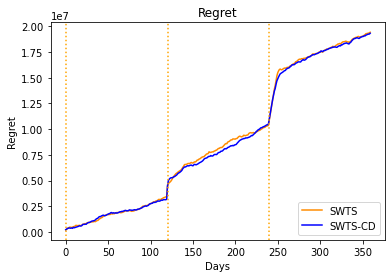

In [1]:
from Context import *    
import matplotlib.pyplot as plt
from Algorithms.promo_category_UCB_learner import *
from Algorithms.TS_Learner import *
from Algorithms.SWTS_Learner import *
from Algorithms.promo_category_UCB_CD_learner import *

#colors
import os
os.system("")

ctx = Context()
days = 360 # 365 days of simulations
n_exp = 2
seasonality = [0*(days//3), 1*(days//3), 2*(days//3)] # days at which the new season start
window_size = int(np.sqrt(days*1000) * 30)
season = 0
best_config=np.zeros(3)
minregret=np.inf
# define the prices candidates for the first and second item
candidates_item1 = [2110.0, 1900.0, 2420.0, 2690.0]
candidates_item2 = [360.0, 410.0, 530.0, 600.0]

# retrieve optimal solution for the seasoson with this candidates
opt_prices,opt_matching, best_daily_reward = ctx.correlated_optimal_solution(candidates_item1,candidates_item2,season=0) # return  best_prices[p1,p2],best_matching, best_reward
opt_price_item1 = opt_prices[0]
opt_price_item2 = opt_prices[1]

v_swts_experimets = np.zeros((n_exp,days))
v_swts_cd_experimets = np.zeros((n_exp,days))
for e in range(n_exp):
    # LEARNERS
    swts_learner = SWTS_Learner(len(candidates_item1) * len(candidates_item2), window_size)
    swts_learner_cd = SWTS_Learner(len(candidates_item1) * len(candidates_item2), window_size)
    #ts_learner = TS_Learner(len(candidates_item1) * len(candidates_item2)) # superarm of couple price_item1, price_item2: <p1,p2>
    normalizing_value = max(candidates_item1) + max(candidates_item2) # value used to normalize the customer reward, used to update the learner
    # UCB Matching learner, one learner for each couple <p1,p2>
    matching_swts_learners_cd = [promo_category_UCB_CD_learner(np.zeros((4,4)).size, *np.zeros((4,4)).shape, M=1.15000000e+02, eps=4.97633866e-03, h=5.03816671e+02, alpha=4.71117966e-02,starting_delay=800,normalizing_value=max(candidates_item2)) for _ in range(len(candidates_item1) * len(candidates_item2))]
    matching_swts_learners = [promo_category_UCB_learner(np.zeros((4,4)).size, *np.zeros((4,4)).shape, 800 ,max(candidates_item2)) for _ in range(len(candidates_item1) * len(candidates_item2))]
    #matching_ts_learners = [promo_category_UCB_CD_learner(np.zeros((4,4)).size, *np.zeros((4,4)).shape, M=1.97000000e+02, eps=4.18522068e-02, h=4.04507992e+02, alpha=4.71117966e-02,starting_delay=800,normalizing_value=max(candidates_item2)) for _ in range(len(candidates_item1) * len(candidates_item2))]
    v_daily_swts_reward = []
    v_daily_swts_cd_reward = []
    v_daily_opt_reward = []
    for d in range(days): 
        # extract the daily customer. It is UNKNOWN
        customer_per_class = ctx.customers_daily_instance() 
        daily_customer_weight = customer_per_class.copy()
        tot_client = sum(customer_per_class)
        daily_swts_reward = 0.0
        daily_swts_cd_reward = 0.0
        daily_opt_reward = 0.0
        if d in seasonality: # new season begin, reset the matching_learner
            season = seasonality.index(d)
            opt_prices,opt_matching, best_daily_reward = ctx.correlated_optimal_solution(candidates_item1,candidates_item2,season=season) # return  best_prices[p1,p2],best_matching, best_reward
            opt_price_item1 = opt_prices[0]
            opt_price_item2 = opt_prices[1]
        
        # simulate the day client by client
        for customer in range(tot_client):
            cus_swts_reward_item1 = 0.0
            cus_swts_reward_item2 = 0.0
            cus_swts_cd_reward_item1 = 0.0
            cus_swts_cd_reward_item2 = 0.0
            opt_customer_reward_item1 = 0.0 # opt reward
            opt_customer_reward_item2 = 0.0 # opt reward

            category = np.random.choice(np.nonzero(customer_per_class)[0])
            customer_per_class[category] -= 1

            # ask to the learner to pull the most promising couple <p1,p2> that maximize the reward
            # SWTS
            swts_pulled_arm = swts_learner.pull_arm() # number between 0..24
            cus_swts_price_item1 = candidates_item1[swts_pulled_arm // len(candidates_item1)]
            cus_swts_price_item2 = candidates_item2[swts_pulled_arm % len(candidates_item2)]
            # SWTS CD
            swts_learner_cd_arm = swts_learner_cd.pull_arm() # number between 0..24
            cus_swts_cd_price_item1 = candidates_item1[swts_learner_cd_arm // len(candidates_item1)]
            cus_swts_cd_price_item2 = candidates_item2[swts_learner_cd_arm % len(candidates_item2)]
            # query the corresponding superarm learner and compute the discounted price 
            # SWTS
            sub_swts_matching = matching_swts_learners[swts_pulled_arm].pull_arm() # suboptimal matching. row_ind, col_ind
            cus_swts_price_item2_discounted = cus_swts_price_item2 * (1-ctx.discount_promos[ sub_swts_matching[1][category] ])
            # SWTS CD
            sub_swts_cd_matching = matching_swts_learners_cd[swts_learner_cd_arm].pull_arm() # suboptimal matching. row_ind, col_ind
            cus_swts_cd_price_item2_discounted = cus_swts_cd_price_item2 * (1-ctx.discount_promos[sub_swts_cd_matching[1][category] ])
            # OPT
            opt_price_item2_discounted = opt_price_item2 * (1-ctx.discount_promos[ opt_matching[1][category] ])

            # purchase simulations
            cus_swts_buy_or_not_item1 = ctx.purchase_online_first_element(cus_swts_price_item1,category,season) 
            cus_swts_cd_buy_or_not_item1 = ctx.purchase_online_first_element(cus_swts_cd_price_item1,category,season)
            opt_buy_or_not_item1 = ctx.purchase_online_first_element(opt_price_item1,category,season)
            cus_swts_buy_or_not_item2 = 0
            cus_swts_cd_buy_or_not_item2 = 0
            opt_buy_or_not_item2 = 0

            # compute the rewenue of the first and second item for both optimal solution and the online learning
            if cus_swts_buy_or_not_item1:
                cus_swts_buy_or_not_item2 = ctx.purchase_online_second_element(cus_swts_price_item2_discounted, category,season) 
            if cus_swts_cd_buy_or_not_item1:
                cus_swts_cd_buy_or_not_item2 = ctx.purchase_online_second_element(cus_swts_cd_price_item2_discounted, category,season)
            if opt_buy_or_not_item1:
                opt_buy_or_not_item2 = ctx.purchase_online_second_element(opt_price_item2_discounted, category,season)
            
            # computing rewards
            cus_swts_reward_item1 = cus_swts_buy_or_not_item1 * cus_swts_price_item1
            cus_swts_reward_item2 = cus_swts_buy_or_not_item2 * cus_swts_price_item2_discounted
            cus_swts_cd_reward_item1 = cus_swts_cd_buy_or_not_item1 * cus_swts_cd_price_item1
            cus_swts_cd_reward_item2 = cus_swts_cd_buy_or_not_item2 * cus_swts_cd_price_item2_discounted
            opt_customer_reward_item1 = opt_buy_or_not_item1 * opt_price_item1
            opt_customer_reward_item2 = opt_buy_or_not_item2 * opt_price_item2_discounted

            # update learners
            swts_learner.update(swts_pulled_arm, (cus_swts_reward_item1 + cus_swts_reward_item2 )/normalizing_value)
            swts_learner_cd.update(swts_learner_cd_arm, (cus_swts_cd_reward_item1 + cus_swts_cd_reward_item2 )/normalizing_value)
            if cus_swts_buy_or_not_item1:
                matching_swts_learners[swts_pulled_arm].update(sub_swts_matching, cus_swts_reward_item2, category=category)
            if cus_swts_cd_buy_or_not_item1:
                matching_swts_learners_cd[swts_learner_cd_arm].update(sub_swts_cd_matching, cus_swts_cd_reward_item2, category=category)
           
            
            if(customer==1 and (e==0 or e==2) and (d==0 or d==200)):
                print('___________________')
                print(f'| Day: {d+1} - Experiment {e+1}')
                print(f'| Today customers distribution : {daily_customer_weight}')
                print(f'| Customer #{customer} of category: {ctx.classes_info[category]["name"]}: ')
                print(f'| {cus_swts_price_item1 = } --- {cus_swts_price_item2 = }')
                print(f'| {cus_swts_cd_price_item1 = } --- {cus_swts_cd_price_item2 = }')
                print(f'| {opt_price_item1 = } --- {opt_price_item2 = }')
                print(f'/ <swts matching> : {sub_swts_matching} --> {round(cus_swts_price_item2_discounted,2) = }')
                print(f'/ <swts cd   matching> : {sub_swts_cd_matching} --> {round(cus_swts_cd_price_item2_discounted,2) = }')
                print(f'\ <opt  matching> : {opt_matching} --> {round(opt_price_item2_discounted,2) = }')
                print("The rest of the clients are not printed...")

            # storing rewards
            daily_swts_reward += (cus_swts_reward_item1 + cus_swts_reward_item2 )
            daily_swts_cd_reward += (cus_swts_cd_reward_item1 + cus_swts_cd_reward_item2 )
            daily_opt_reward += (opt_customer_reward_item1 + opt_customer_reward_item2 )
        v_daily_swts_reward.append(daily_swts_reward)
        v_daily_swts_cd_reward.append(daily_swts_cd_reward)
        v_daily_opt_reward.append(daily_opt_reward)
    v_swts_experimets[e:] = np.cumsum(v_daily_opt_reward) - np.cumsum(v_daily_swts_reward)
    v_swts_cd_experimets[e:] = np.cumsum(v_daily_opt_reward) - np.cumsum(v_daily_swts_cd_reward)

                
# ploting results
plt.figure(1)
plt.xlabel("Days")
plt.ylabel("Regret")
plt.plot(np.mean(v_swts_experimets,axis=0),'-', color='darkorange', label = 'SWTS')
plt.plot(np.mean(v_swts_cd_experimets,axis=0),'-', color='blue', label = 'SWTS-CD')
plt.axvline(x=seasonality[0],linestyle=':',color='orange')
plt.axvline(x=seasonality[1],linestyle=':',color='orange')
plt.axvline(x=seasonality[2],linestyle=':',color='orange')
plt.title("Regret")
plt.legend()
plt.show()

We can observe that the change-detection approach has a small impact respect to
the performance of the SW-TS. This is due to the fact that the change-detection
approach catches some false-positive detection; the matching of promo-category of
the second item is influenced by the prices chosen for the two items.